In [41]:
import pandas as pd

file_path = '/Users/shreyababare/Downloads/cleaned_dataset2.csv'
df = pd.read_csv(file_path)
print(df.head())

    Account No  Balance  Amount Third Party Account No    Third Party Name  \
0  839964633.0   3385.0  2602.0                   MTrx               Boots   
1  793069740.0   3318.0  2780.0                   MTrx  Mountain Warehouse   
2  793069740.0   2278.0 -1040.0              705519819                 P2P   
3  705519819.0   2726.0  1040.0              793069740                 P2P   
4  726302171.0   3253.5  1542.5                   MTrx          Craftastic   

           DateTime  
0  01/01/2025 00:00  
1  01/01/2025 00:00  
2  01/01/2025 00:00  
3  01/01/2025 00:00  
4  01/01/2025 00:00  


/var/folders/cs/p5f4qmkd3698y4hpfkyvf1gc0000gn/T/ipykernel_89747/1824281931.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Category', data=category_spending, palette='pastel')


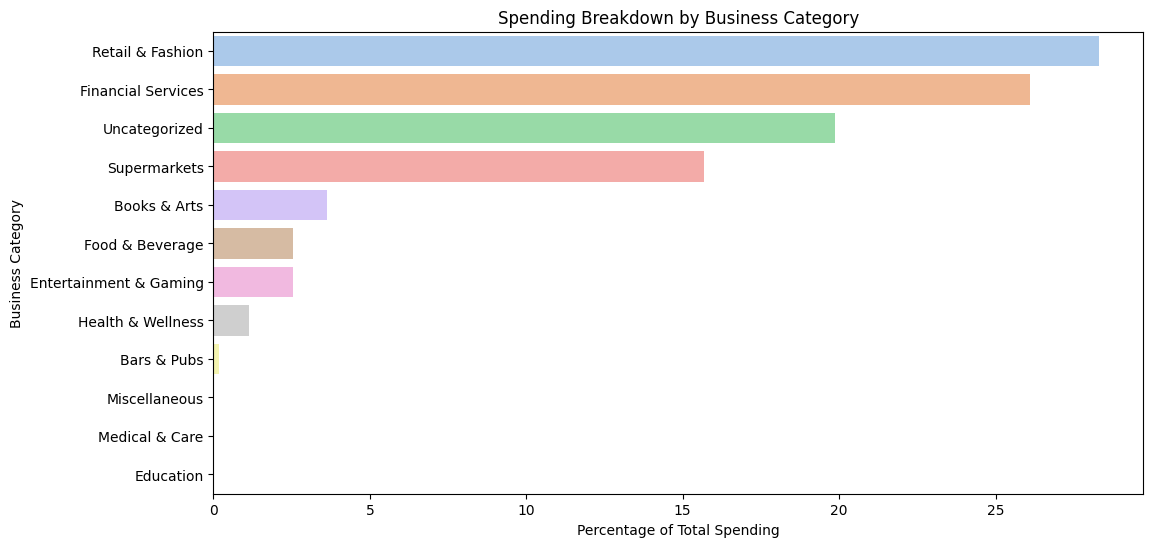

In [43]:
# Define category mapping
category_mapping = {
    'Boots': 'Retail & Fashion', 'Mountain Warehouse': 'Retail & Fashion', 'Amazon': 'Retail & Fashion',
    'Dorothy Perkins': 'Retail & Fashion', 'Topshop': 'Retail & Fashion', 'River Island': 'Retail & Fashion',
    'New Look': 'Retail & Fashion', 'Matalan': 'Retail & Fashion', 'TK Maxx': 'Retail & Fashion',
    'Next': 'Retail & Fashion', 'JD Sports': 'Retail & Fashion', 'Nike': 'Retail & Fashion', 
    'Reebok': 'Retail & Fashion', 'Adidas': 'Retail & Fashion', 'Sports Direct': 'Retail & Fashion',
    'Umbro': 'Retail & Fashion', 'North Face': 'Retail & Fashion',

    'Sainsbury': 'Supermarkets', 'Coop Local': 'Supermarkets', 'Pets at Home': 'Supermarkets',

    'Netflix': 'Entertainment & Gaming', 'Disney': 'Entertainment & Gaming', 'Mojang Studios': 'Entertainment & Gaming',
    'SquareOnix': 'Entertainment & Gaming', 'Blizzard': 'Entertainment & Gaming', 'Xbox': 'Entertainment & Gaming',
    'CeX': 'Entertainment & Gaming', 'Gamestation': 'Entertainment & Gaming',

    'Costa Coffee': 'Food & Beverage', 'Starbucks': 'Food & Beverage', 'AMT Coffee': 'Food & Beverage',
    'Coffee Republic': 'Food & Beverage', 'Coffee #1': 'Food & Beverage', 'Full of Beans': 'Food & Beverage',
    'Bill\'s': 'Food & Beverage', 'Chiquito': 'Food & Beverage', 'JustEat': 'Food & Beverage', 
    'Deliveroo': 'Food & Beverage',

    'The Royal Oak': 'Bars & Pubs', 'The Crown': 'Bars & Pubs', 'The View': 'Bars & Pubs', 
    'Kings Arms': 'Bars & Pubs', 'Red Lion': 'Bars & Pubs', 'Rose & Crown': 'Bars & Pubs',
    'White Hart': 'Bars & Pubs',

    'Lloyds Pharmacy': 'Health & Wellness', 'Specsavers': 'Health & Wellness', 'PureGym': 'Health & Wellness',

    'Daunt Books': 'Books & Arts', 'Waterstones': 'Books & Arts', 'The Works': 'Books & Arts',
    'Foyles': 'Books & Arts', 'Hobbycraft': 'Books & Arts', 'Hobby Lobby': 'Books & Arts', 'Cass Art': 'Books & Arts',
    'Craftastic': 'Books & Arts', 'Brilliant Brushes': 'Books & Arts', 'A Life on Canvas': 'Books & Arts',
    'Stitch By Stitch': 'Books & Arts', 'A Yarn Story': 'Books & Arts', 'Etsy': 'Books & Arts',
    'Blackwell\'s': 'Books & Arts',

    'LBG': 'Financial Services', 'Halifax': 'Financial Services', 'Premier Finance': 'Financial Services',
    'Howlader and Co Chartered Accountants': 'Financial Services', 'CPA': 'Financial Services',

    'Green Park Academy': 'Education', 'Lavender Primary': 'Education', 'Sunny Care Nursery': 'Education',

    'Westport Care Home': 'Medical & Care', 'Remedy plus care': 'Medical & Care', 'Kew House': 'Medical & Care',
    'University College Hospital': 'Medical & Care', 'Lavender Fields': 'Medical & Care',

    'External Entity': 'Miscellaneous', 'Town High': 'Miscellaneous', 'Under the Dryer': 'Miscellaneous',
    'FootballPitch': 'Miscellaneous', 'Green Park': 'Miscellaneous', 'Collector Cave': 'Miscellaneous'
}

def get_unique_third_parties(df):
    return df['Third Party Name'].unique()

def categorize_spending(df):
    df['Category'] = df['Third Party Name'].map(category_mapping).fillna('Uncategorized')
    df['Spending'] = df['Amount'].apply(lambda x: -x if x < 0 else 0)

    category_spending = df.groupby('Category')['Spending'].sum().reset_index()
    category_spending['Percentage'] = (category_spending['Spending'] / category_spending['Spending'].sum()) * 100
    category_spending = category_spending.sort_values(by='Percentage', ascending=False)

    return category_spending

def plot_spending_stacked_bar_chart(category_spending):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Percentage', y='Category', data=category_spending, palette='pastel')
    plt.xlabel('Percentage of Total Spending')
    plt.ylabel('Business Category')
    plt.title('Spending Breakdown by Business Category')
    plt.show()

if 'df' in locals():
    category_spending = categorize_spending(df)
    plot_spending_stacked_bar_chart(category_spending)
else:
    print("Error: DataFrame 'df' is not defined. Load your data before running the script.")


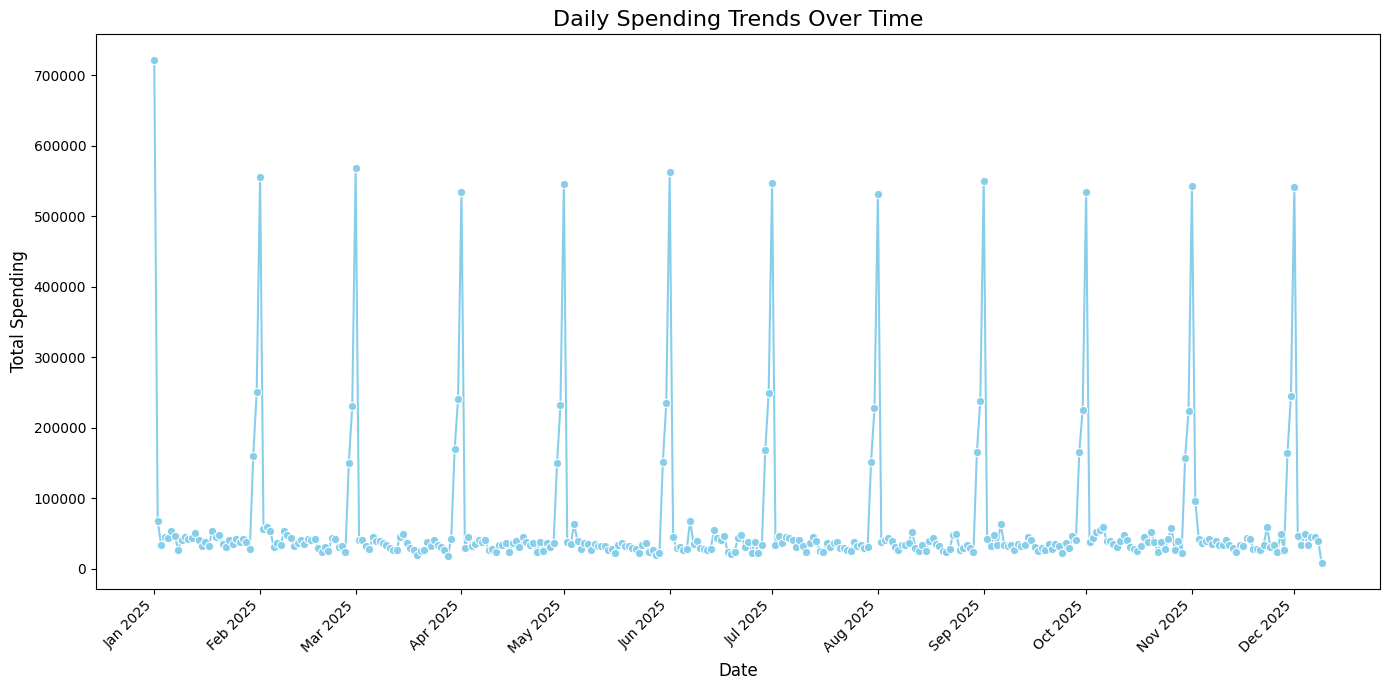

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

def plot_spending_trends(df):
    # Convert 'DateTime' to datetime objects
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M', errors='coerce')

    # Calculate daily spending (negative amounts)
    df['Spending'] = df['Amount'].apply(lambda x: -x if x < 0 else 0)

    # Group by date and sum spending
    daily_spending = df.groupby(df['DateTime'].dt.date)['Spending'].sum()

    # Create the time series line plot
    plt.figure(figsize=(14, 7))
    sns.lineplot(x=daily_spending.index, y=daily_spending.values, marker='o', color='skyblue')

    # Add labels and title
    plt.title('Daily Spending Trends Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Spending', fontsize=12)

    # Improve tick parameters and rotate date labels for readability
    plt.xticks(rotation=45, ha='right')

    # Set x-axis ticks to show every month
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator()) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  

    plt.tight_layout()
    plt.show()

# Ensure df is defined before calling the function
plot_spending_trends(df)


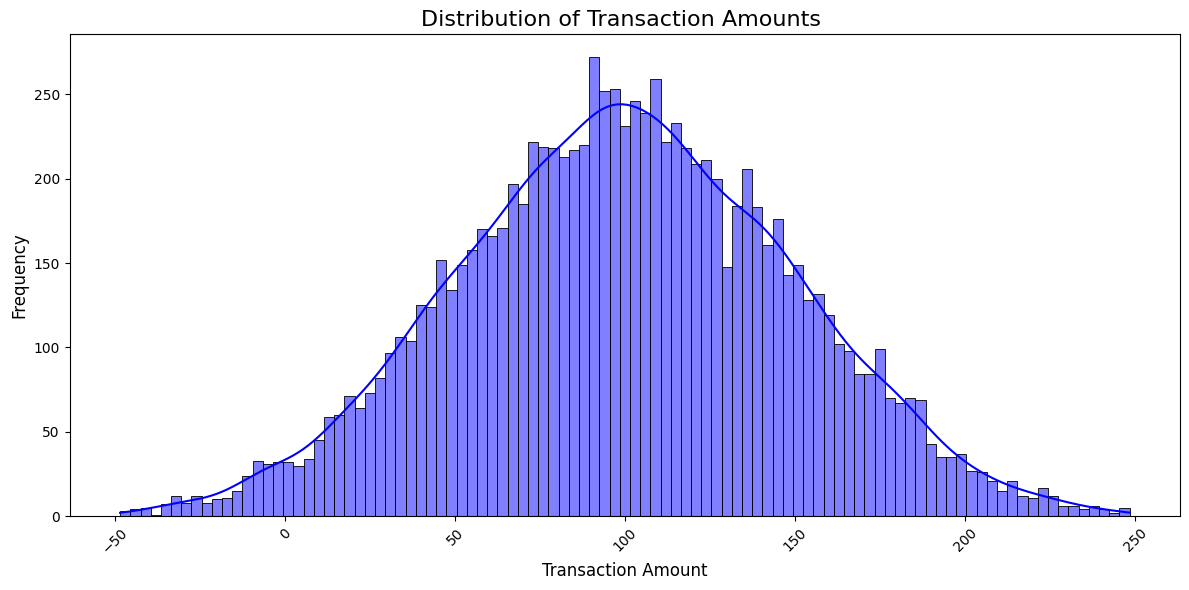

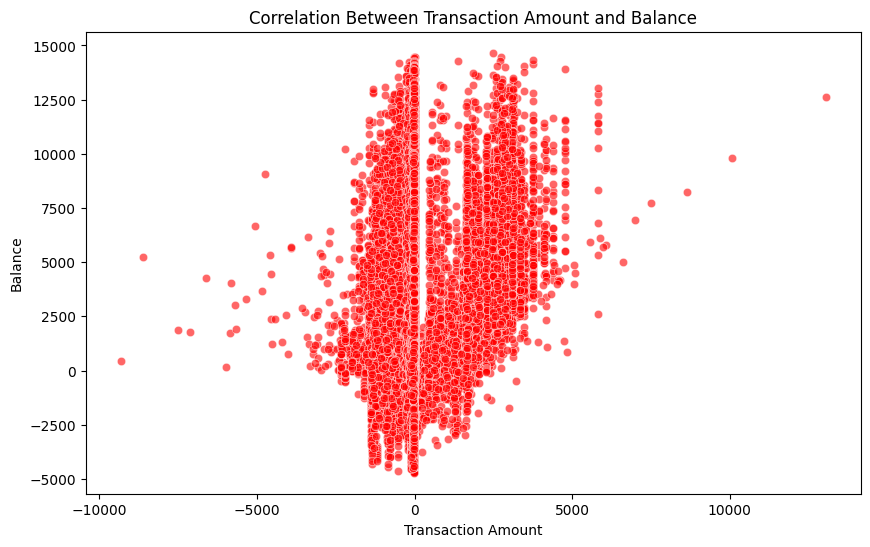

Correlation between Transaction Amount and Balance: 0.10


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_transaction_distribution(df):
    median_amount = df['Amount'].median()
    std_amount = df['Amount'].std()

    lower_bound = median_amount - 3 * std_amount
    upper_bound = median_amount + 3 * std_amount

    filtered_df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

    plt.figure(figsize=(12, 6))

    bins = np.linspace(filtered_df['Amount'].min(), filtered_df['Amount'].max(), 100)

    sns.histplot(filtered_df['Amount'], bins=bins, kde=True, color='blue')
    plt.title("Distribution of Transaction Amounts ", fontsize=16)
    plt.xlabel("Transaction Amount", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

data = {'Amount': np.random.normal(loc=100, scale=50, size=10000)}
data_df = pd.DataFrame(data)

plot_transaction_distribution(data_df)

def plot_correlation_spending_balance(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Amount", y="Balance", alpha=0.6, color='red')
    plt.title("Correlation Between Transaction Amount and Balance")
    plt.xlabel("Transaction Amount")
    plt.ylabel("Balance")
    plt.show()

    
    # Print correlation coefficient
    correlation = df[['Amount', 'Balance']].corr().iloc[0,1]
    print(f"Correlation between Transaction Amount and Balance: {correlation:.2f}")

# Call functions
plot_correlation_spending_balance(df)